In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv('tips.csv')

In [3]:
data.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [4]:
data.shape

(244, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [6]:
data.describe().T

count       mean       std   min      25%     50%      75%    max
total_bill  244.0  19.785943  8.902412  3.07  13.3475  17.795  24.1275  50.81
tip         244.0   2.998279  1.383638  1.00   2.0000   2.900   3.5625  10.00
size        244.0   2.569672  0.951100  1.00   2.0000   2.000   3.0000   6.00

# Data visualization

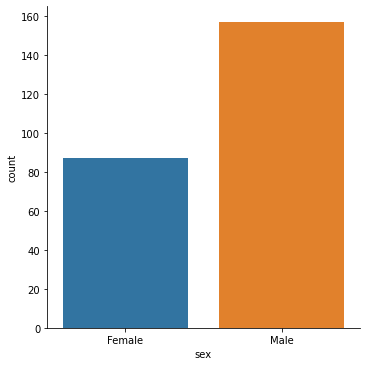

In [7]:
sns.catplot(x='sex',data=data,kind='count')

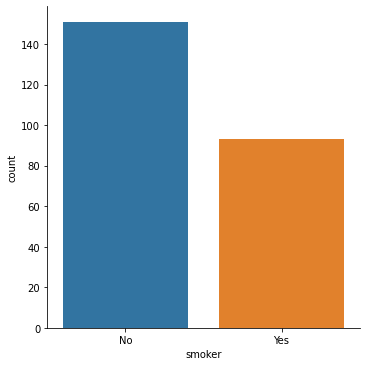

In [8]:
sns.catplot(x='smoker',data=data,kind='count')

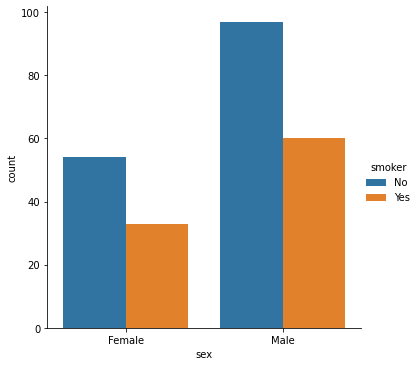

In [9]:
sns.catplot(x='sex',data=data,kind='count',hue='smoker')

In [10]:
data['day'].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

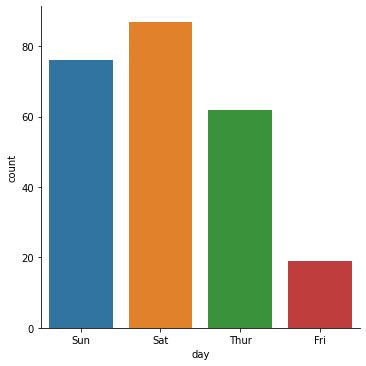

In [11]:
sns.catplot(x='day',data=data,kind='count')

In [12]:
data['time'].unique()

array(['Dinner', 'Lunch'], dtype=object)

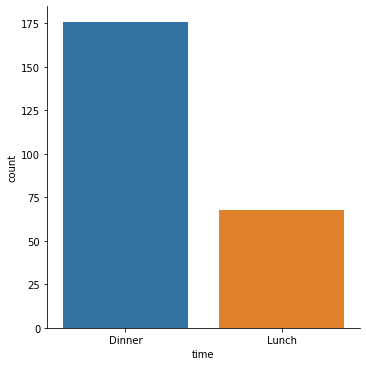

In [13]:
sns.catplot(x='time',data=data,kind='count')

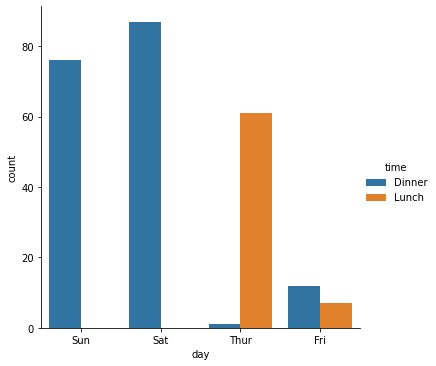

In [14]:
sns.catplot(x='day',data=data,kind='count', hue='time',)

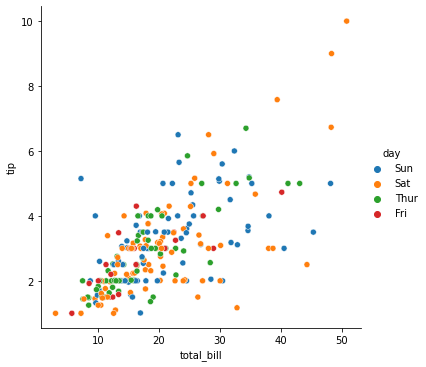

In [15]:
sns.relplot(data=data, x="total_bill", y="tip", hue="day")

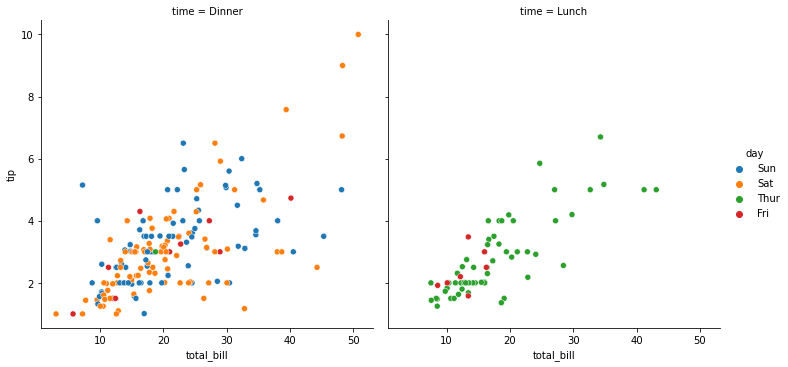

In [16]:
sns.relplot(data=data, x="total_bill", y="tip", hue="day", col="time")

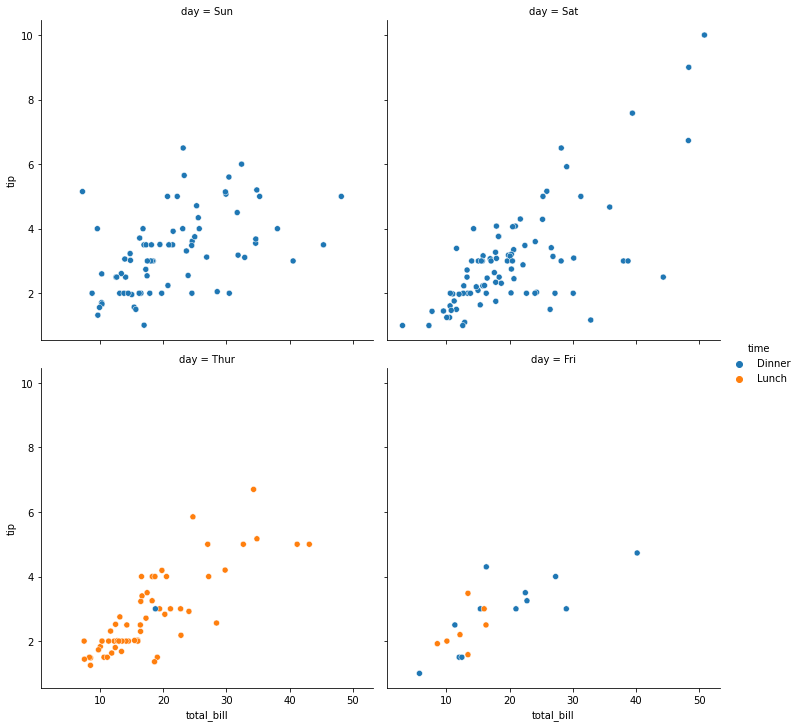

In [17]:
sns.relplot(data=data, x="total_bill", y="tip", hue="time", col="day", col_wrap=2)

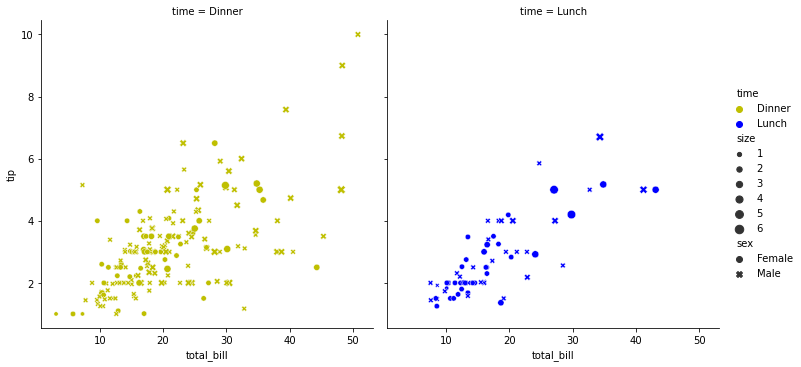

In [18]:
sns.relplot(data=data, x="total_bill", y="tip", col="time",
    hue="time", size="size", style="sex",
    palette=["y", "b"])

# Preprocessing

In [19]:
df = data.copy()

In [20]:
df.tail()

total_bill   tip     sex smoker   day    time  size
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

### Label Encoder

In [21]:
lE = LabelEncoder()

In [22]:
df['sex'] = pd.DataFrame(lE.fit_transform(df['sex']))
sex = pd.DataFrame({i : lE.inverse_transform([i]) for i in range(len(df['sex'].unique()))})  

df['smoker'] = pd.DataFrame(lE.fit_transform(df['smoker']))
smoker = pd.DataFrame({i : lE.inverse_transform([i]) for i in range(len(df['smoker'].unique()))})    

df['time'] = pd.DataFrame(lE.fit_transform(df['time']))
time = pd.DataFrame({i : lE.inverse_transform([i]) for i in range(len(df['time'].unique()))})    

In [23]:
pd.concat([sex,smoker,time])

0      1
0  Female   Male
0      No    Yes
0  Dinner  Lunch

In [24]:
df.head()

total_bill   tip  sex  smoker  day  time  size
0       16.99  1.01    0       0  Sun     0     2
1       10.34  1.66    1       0  Sun     0     3
2       21.01  3.50    1       0  Sun     0     3
3       23.68  3.31    1       0  Sun     0     2
4       24.59  3.61    0       0  Sun     0     4

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    int32  
 3   smoker      244 non-null    int32  
 4   day         244 non-null    object 
 5   time        244 non-null    int32  
 6   size        244 non-null    int64  
dtypes: float64(2), int32(3), int64(1), object(1)
memory usage: 10.6+ KB


### Aykırı Değer

In [26]:
q1 = df["tip"].quantile(0.25)
q3 = df["tip"].quantile(0.75)      

IOC = q3 - q1

alt_sınır = q1 - 1.5*IOC
üst_sınır = q3 + 1.5*IOC

sınır = (df["tip"] < alt_sınır) | (df["tip"] > üst_sınır)
df["Aykırı_Deger"] = sınır
print('Aykırı Değer Sayısı =>\n',df["Aykırı_Deger"].value_counts())

Aykırı Değer Sayısı =>
 False    235
True       9
Name: Aykırı_Deger, dtype: int64


In [27]:
df.head()

total_bill   tip  sex  smoker  day  time  size  Aykırı_Deger
0       16.99  1.01    0       0  Sun     0     2         False
1       10.34  1.66    1       0  Sun     0     3         False
2       21.01  3.50    1       0  Sun     0     3         False
3       23.68  3.31    1       0  Sun     0     2         False
4       24.59  3.61    0       0  Sun     0     4         False

In [28]:
df = df.loc[df["Aykırı_Deger"] == False]
del df["Aykırı_Deger"]
df = df.reset_index(drop=True)

In [29]:
df.tail()

total_bill   tip  sex  smoker   day  time  size
230       35.83  4.67    0       0   Sat     0     3
231       27.18  2.00    0       1   Sat     0     2
232       22.67  2.00    1       1   Sat     0     2
233       17.82  1.75    1       0   Sat     0     2
234       18.78  3.00    0       0  Thur     0     2

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  235 non-null    float64
 1   tip         235 non-null    float64
 2   sex         235 non-null    int32  
 3   smoker      235 non-null    int32  
 4   day         235 non-null    object 
 5   time        235 non-null    int32  
 6   size        235 non-null    int64  
dtypes: float64(2), int32(3), int64(1), object(1)
memory usage: 10.2+ KB


Kişi başına ortalama Bill adına yeni bir özellik ekliyoruz

In [31]:
corr = df[["total_bill","tip","size"]].corr()
corr

total_bill       tip      size
total_bill    1.000000  0.595065  0.581462
tip           0.595065  1.000000  0.450306
size          0.581462  0.450306  1.000000

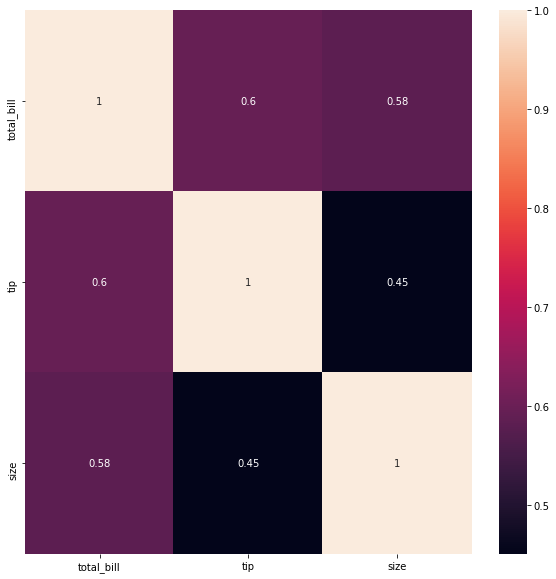

In [32]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)
plt.show()

### StandartScaler

In [33]:
Scaler = MinMaxScaler()
columns = ["total_bill","tip","size"]
scaled_columns = pd.DataFrame(Scaler.fit_transform(df[columns]),columns=columns)

In [34]:
scaled_columns.head()

total_bill       tip  size
0    0.308647  0.002062   0.2
1    0.161197  0.136082   0.4
2    0.397783  0.515464   0.4
3    0.456984  0.476289   0.2
4    0.477162  0.538144   0.6

In [35]:
scaled_columns.describe().T

count      mean       std  min       25%       50%       75%  max
total_bill  235.0  0.355939  0.181297  0.0  0.224945  0.319069  0.446674  1.0
tip         235.0  0.378723  0.226888  0.0  0.206186  0.358763  0.515464  1.0
size        235.0  0.303830  0.183351  0.0  0.200000  0.200000  0.400000  1.0

In [36]:
df.drop(["total_bill","tip","size"],axis=1,inplace=True)
df = pd.concat([df, scaled_columns], axis=1)

In [37]:
df.tail()

sex  smoker   day  time  total_bill       tip  size
230    0       0   Sat     0    0.726386  0.756701   0.4
231    0       1   Sat     0    0.534590  0.206186   0.2
232    1       1   Sat     0    0.434590  0.206186   0.2
233    1       0   Sat     0    0.327051  0.154639   0.2
234    0       0  Thur     0    0.348337  0.412371   0.2

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sex         235 non-null    int32  
 1   smoker      235 non-null    int32  
 2   day         235 non-null    object 
 3   time        235 non-null    int32  
 4   total_bill  235 non-null    float64
 5   tip         235 non-null    float64
 6   size        235 non-null    float64
dtypes: float64(3), int32(3), object(1)
memory usage: 10.2+ KB


### One Hot Encoding

In [39]:
df = pd.concat([df, pd.get_dummies(df["day"],prefix="day",)], axis=1)
df.head()

sex  smoker  day  time  total_bill       tip  size  day_Fri  day_Sat  \
0    0       0  Sun     0    0.308647  0.002062   0.2        0        0   
1    1       0  Sun     0    0.161197  0.136082   0.4        0        0   
2    1       0  Sun     0    0.397783  0.515464   0.4        0        0   
3    1       0  Sun     0    0.456984  0.476289   0.2        0        0   
4    0       0  Sun     0    0.477162  0.538144   0.6        0        0   

   day_Sun  day_Thur  
0        1         0  
1        1         0  
2        1         0  
3        1         0  
4        1         0

In [40]:
df.drop('day',axis=1,inplace=True)

In [41]:
df.head()

sex  smoker  time  total_bill       tip  size  day_Fri  day_Sat  day_Sun  \
0    0       0     0    0.308647  0.002062   0.2        0        0        1   
1    1       0     0    0.161197  0.136082   0.4        0        0        1   
2    1       0     0    0.397783  0.515464   0.4        0        0        1   
3    1       0     0    0.456984  0.476289   0.2        0        0        1   
4    0       0     0    0.477162  0.538144   0.6        0        0        1   

   day_Thur  
0         0  
1         0  
2         0  
3         0  
4         0

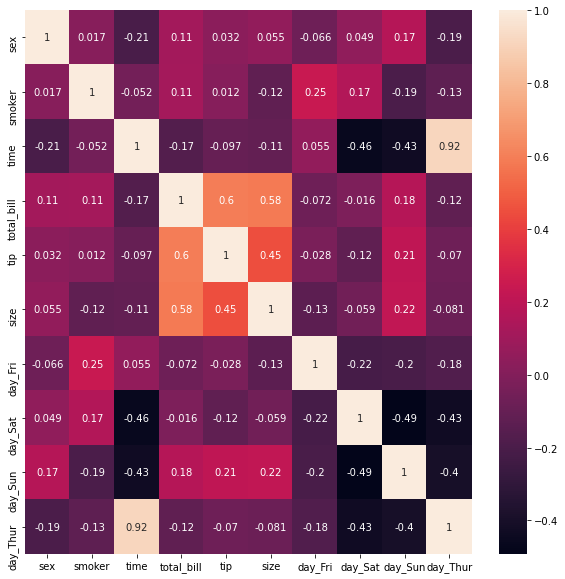

In [42]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sex         235 non-null    int32  
 1   smoker      235 non-null    int32  
 2   time        235 non-null    int32  
 3   total_bill  235 non-null    float64
 4   tip         235 non-null    float64
 5   size        235 non-null    float64
 6   day_Fri     235 non-null    uint8  
 7   day_Sat     235 non-null    uint8  
 8   day_Sun     235 non-null    uint8  
 9   day_Thur    235 non-null    uint8  
dtypes: float64(3), int32(3), uint8(4)
memory usage: 9.3 KB


### Data Select

In [44]:
df.corrwith(df["tip"]).abs().nlargest(5)

tip           1.000000
total_bill    0.595065
size          0.450306
day_Sun       0.208303
day_Sat       0.123219
dtype: float64

In [45]:
y = df.tip
x = df.loc[:,df.columns!="tip"]

In [46]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=24)

In [47]:
modeller=[]
scores=[]
def compML(alg,x_train,y_train,x_test,y_test):
    model=alg().fit(x_train,y_train)
    y_pred=model.predict(x_test)
    RMSE= np.sqrt(mean_squared_error(y_test,y_pred))
    model_ismi= alg.__name__
    model_score = model.score(x_test,y_test)
    if model_score > 0:
        scores.append(model_score*100)
        modeller.append(model_ismi)
        print(model_ismi ," Modeli Test Hatası => ", RMSE,' |  Model Score => ', model_score*100)

models=[LGBMRegressor, Lasso,
        XGBRegressor, LinearRegression,
        GradientBoostingRegressor,
        RandomForestRegressor, ElasticNet,
        DecisionTreeRegressor, Ridge,
        MLPRegressor,
        KNeighborsRegressor, 
        SVR]

for i in models:
    compML(i,X_train,y_train,X_test,y_test)

LGBMRegressor  Modeli Test Hatası =>  0.1923731300901998  |  Model Score =>  42.30945148119688
XGBRegressor  Modeli Test Hatası =>  0.2105726925591815  |  Model Score =>  30.877418978899517
LinearRegression  Modeli Test Hatası =>  0.15912534269478043  |  Model Score =>  60.52750764290275
GradientBoostingRegressor  Modeli Test Hatası =>  0.2131936272438425  |  Model Score =>  29.14601472435291
RandomForestRegressor  Modeli Test Hatası =>  0.19173204536026323  |  Model Score =>  42.6933190629601
DecisionTreeRegressor  Modeli Test Hatası =>  0.21815947606339853  |  Model Score =>  25.80681599865654
Ridge  Modeli Test Hatası =>  0.1623646065635871  |  Model Score =>  58.904092575863906
MLPRegressor  Modeli Test Hatası =>  0.1700303990150924  |  Model Score =>  54.93192655732082
KNeighborsRegressor  Modeli Test Hatası =>  0.18937093917932935  |  Model Score =>  44.096047861727236
SVR  Modeli Test Hatası =>  0.16220536118679724  |  Model Score =>  58.98466584976336


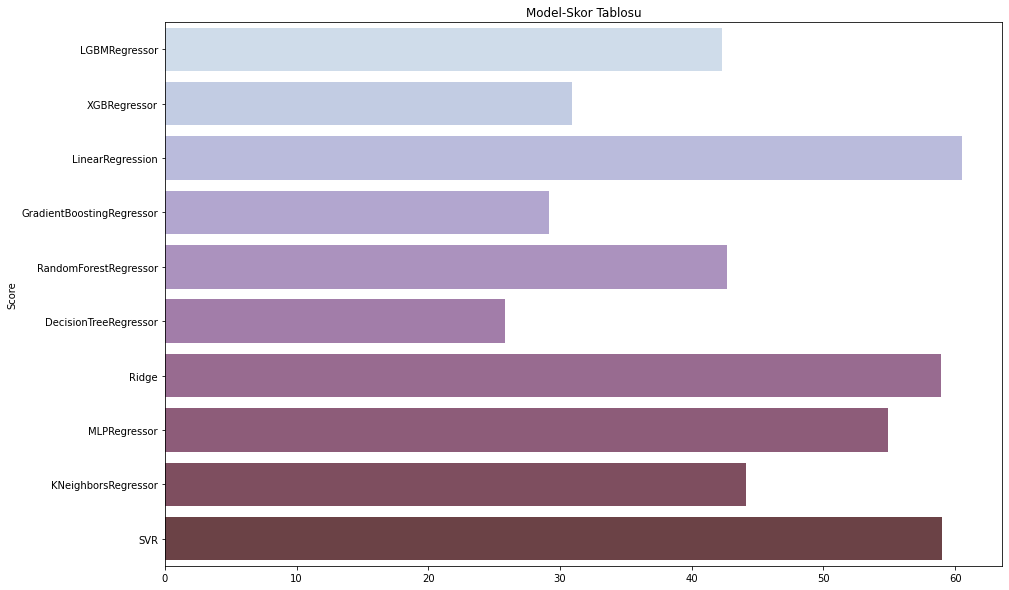

In [48]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x=np.abs(scores), y=modeller, palette="ch:4.5,-.7,dark=.3")
ax.set_title("Model-Skor Tablosu")
ax.set_ylabel("Modeller")
ax.set_ylabel("Score")
plt.show()

In [49]:
Linear=LinearRegression()     
Linear.fit(X_train,y_train)

Linear_pred = Linear.predict(X_test)

model_score = Linear.score(X_test,y_test)
r2_skor = r2_score(y_test, Linear_pred)
hata_skor = np.sqrt(mean_squared_error(y_test, Linear_pred))


print("Model Score: ", model_score*100)
print("R2_skoru: ", r2_skor)
print("Hata Kare: ", hata_skor)

Model Score:  60.52750764290275
R2_skoru:  0.6052750764290274
Hata Kare:  0.15912534269478043
